# 0_Preparing

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
x_train = mnist.train.images
y_train = mnist.train.labels

In [7]:
x_test = mnist.test.images
y_test = mnist.test.labels

In [9]:
batch_x, batch_y = mnist.train.next_batch(64)

In [11]:
batch_x.shape

(64, 784)

# 1_Introduction

In [16]:
import tensorflow as tf

In [17]:
hello = tf.constant('hello tensorflow')

In [18]:
session = tf.Session()

In [19]:
session.run(hello)

'hello tensorflow'

In [20]:
a = tf.constant(2)
b = tf.constant(3)

In [21]:
# Launch the default graph.
with tf.Session() as sess:
    print "a: %i" % sess.run(a), "b: %i" % sess.run(b)
    print "Addition with constants: %i" % sess.run(a+b)
    print "Multiplication with constants: %i" % sess.run(a*b)

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


In [22]:
# Basic Operations with variable as graph input
# The value returned by the constructor represents the output
# of the Variable op. (define as input when running session)
# tf Graph input
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

In [23]:
add = tf.add(a, b)
mul = tf.multiply(a, b)

In [26]:
with tf.Session() as sess:
    # Run every operation with variable input
    print "Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3})
    print "Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3})

Addition with variables: 5
Multiplication with variables: 6


In [27]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

In [28]:
product = tf.matmul(matrix1, matrix2)

In [30]:
with tf.Session() as sess:
    result = sess.run(product)
    print result

[[ 12.]]


# 2_BasicModels

## 1. Linear Regression

In [54]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rd = numpy.random

In [55]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [56]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [57]:
# tf Graph Input
X = tf.placeholder('float')
Y = tf.placeholder('float')

In [58]:
# Set model weights
W = tf.Variable(rd.randn(), name='weight')
b = tf.Variable(rd.randn(), name='bias')

In [59]:
pred = tf.add(tf.multiply(X, W), b)

In [60]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [61]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.094985768 W= 0.324741 b= 0.26086
Epoch: 0100 cost= 0.092902653 W= 0.320272 b= 0.293013
Epoch: 0150 cost= 0.091060326 W= 0.316068 b= 0.323253
Epoch: 0200 cost= 0.089430973 W= 0.312115 b= 0.351694
Epoch: 0250 cost= 0.087990001 W= 0.308396 b= 0.378444
Epoch: 0300 cost= 0.086715639 W= 0.304899 b= 0.403604
Epoch: 0350 cost= 0.085588679 W= 0.30161 b= 0.427266
Epoch: 0400 cost= 0.084592044 W= 0.298516 b= 0.449522
Epoch: 0450 cost= 0.083710626 W= 0.295606 b= 0.470454
Epoch: 0500 cost= 0.082931243 W= 0.29287 b= 0.490141
Epoch: 0550 cost= 0.082242034 W= 0.290296 b= 0.508657
Epoch: 0600 cost= 0.081632577 W= 0.287875 b= 0.526072
Epoch: 0650 cost= 0.081093661 W= 0.285598 b= 0.542451
Epoch: 0700 cost= 0.080617107 W= 0.283457 b= 0.557856
Epoch: 0750 cost= 0.080195747 W= 0.281443 b= 0.572345
Epoch: 0800 cost= 0.079823196 W= 0.279549 b= 0.585972
Epoch: 0850 cost= 0.079493776 W= 0.277767 b= 0.59879
Epoch: 0900 cost= 0.079202503 W= 0.276091 b= 0.610846
Epoch: 0950 cost= 0.078945041 W=

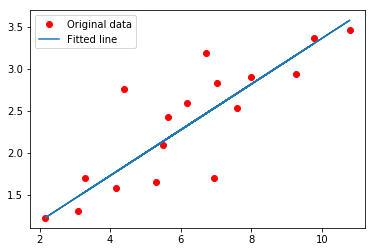

In [62]:
with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## 2. Logistic Regression

In [64]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
